WARNING    Note that the synaptic pathway 'synapses_1_pre' will run on the clock of the group 'poissongroup_2' using a dt of 10. us. Either the Synapses object 'synapses_1' or the target 'neurongroup_2' (or both) are using a different dt. This might lead to unexpected results. In particular, all delays will be rounded to multiples of 10. us. If in doubt, try to ensure that 'poissongroup_2', 'synapses_1', and 'neurongroup_2' use the same dt. [brian2.synapses.synapses.synapses_dt_mismatch]


Missing compiler_cxx fix for MSVCCompiler
Number of spikes: [56]
Spike times: [ 0.0381  0.0802  0.1381  0.1812  0.2221  0.3007  0.3639  0.4255  0.4627
  0.5359  0.5994  0.629   0.6777  0.7295  0.7744  0.8105  0.8477  0.8925
  0.9693  1.0011  1.047   1.0749  1.1385  1.1799  1.2369  1.2756  1.3433
  1.3708  1.4339  1.4948  1.5841  1.6417  1.6769  1.7306  1.7728  1.8253
  1.8853  1.9567  2.0273  2.0524  2.1289  2.1743  2.1953  2.2421  2.298
  2.3583  2.39    2.4313  2.4866  2.5505  2.612   2.7016  2.7401  2.8263
  2.8733  2.9359] s
[0.042100000000000005, 0.057899999999999993, 0.043099999999999999, 0.04090000000000002, 0.078600000000000003, 0.063199999999999978, 0.061600000000000044, 0.037199999999999955, 0.073200000000000043, 0.063500000000000001, 0.02959999999999996, 0.048700000000000077, 0.051799999999999957, 0.044900000000000051, 0.03609999999999991, 0.037200000000000011, 0.044800000000000062, 0.076799999999999979, 0.03180000000000005, 0.045900000000000052, 0.027899999999999814, 0.0636

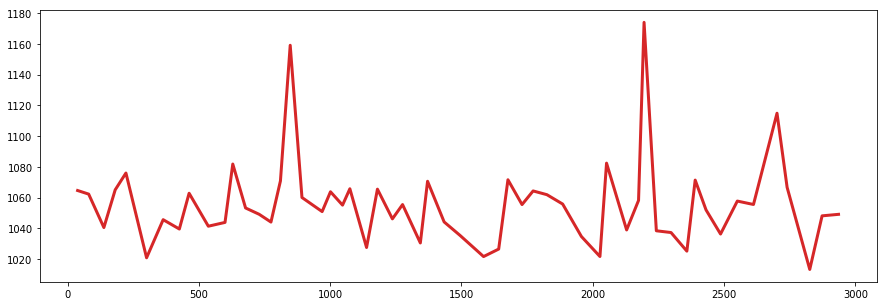

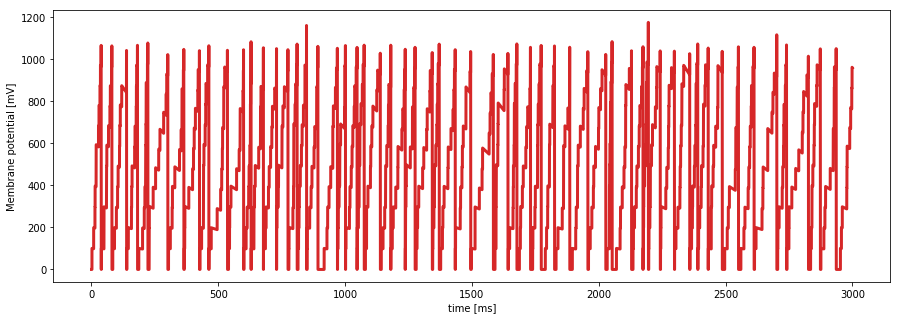

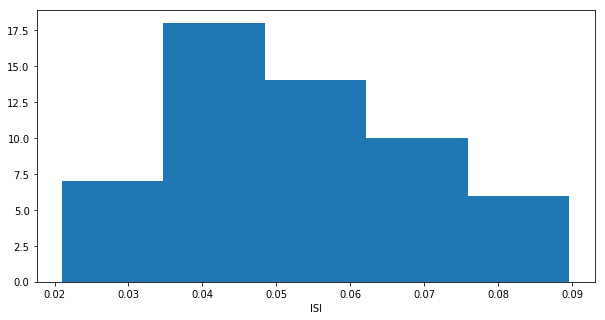

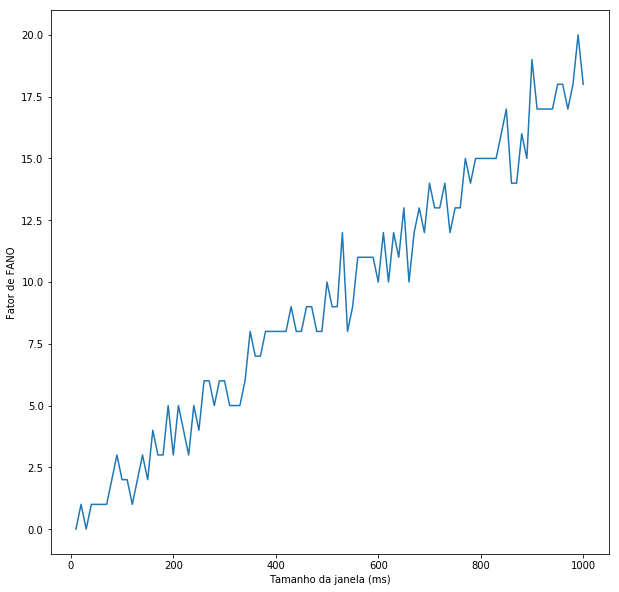

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import brian2 as b2
import math
from brian2 import *
from neurodynex.tools import input_factory, plot_tools

start_scope() 
# Descrição dos parâmetros
tau = 500*ms
simulation_time = 3*second
num_inputs = 10
input_rate = 20*Hz
weight = 0.1

# Use this list to store output rates
output_rates = []

# Constructing the network 
P = PoissonGroup(num_inputs, rates=input_rate, dt = 0.01*ms)

# Descrição do modelo neurônio 
eqs = '''
dv/dt = -v/tau : 1
'''
G = NeuronGroup(1, eqs, threshold='v>1', reset='v=0', method='exact')

statemon = StateMonitor(G, ["v"], record=True) # monitor de potencial
spikemon = SpikeMonitor(G, variables='v') # monitor de spikes

S = Synapses(P, G, on_pre='v += weight')
S.connect()

statemon = StateMonitor(G, 'v', record=True) # monitor de potencial
spikemon = SpikeMonitor(G, 'v') # monitor de spikes
# Run it and store the output firing rate in the list
run(simulation_time)

print("Number of spikes: %s" % spikemon.count[:])
print("Spike times: %s" % spikemon.t[:])

fig = figure(figsize=(15, 5))
plt.plot(spikemon.t/b2.ms, spikemon.v/b2.mV, c='C3', lw=3)
fig = figure(figsize=(15, 5))
plt.plot(statemon.t/b2.ms, statemon.v[0]/b2.mV, c='C3', lw=3)
xlabel('time [ms]')
ylabel('Membrane potential [mV]')


vector = list()
spikes = spikemon.count[:]
inter = full(len(spikes[:]), nan)
for idx in range(len(spikes)):
    for k in range(len(spikemon.t)-1):
        inter[idx] = (float(spikemon.spike_trains()[idx][k+1]) - float(spikemon.spike_trains()[idx][k]));
        vector.append(inter[idx])
        
               
print vector
fig = figure(figsize=(10, 5))
hist(vector, 5)
xlabel('ISI')

isi_mu = mean(vector)
isi_std = std(vector)
CV = isi_std*100/isi_mu
print("The Coefficient of Variation (CV) is in percetange of: %s" % CV)

aux=[]
for j in range(1000):
    state_monitor = b2.StateMonitor(G, ["v"], record=True)
    spike_monitor = b2.SpikeMonitor(G)
    b2.run(100*b2.ms)
    aux.append(spike_monitor.count[:])
    
print("ALL FANOs: {}".format(aux))
mean = np.mean(aux)
# print(mean)
var = np.var(aux)
# print(var)
print("FANO: {}".format(var/mean))

auxi=[]
win=[]
for z in range(100):
    state_monitor = b2.StateMonitor(G, ["v"], record=True)
    spike_monitor = b2.SpikeMonitor(G)
    win.append(10*(z+1))
    b2.run(10*(z+1)*b2.ms)
    auxi.append(spike_monitor.count[:])

plt.figure(figsize=(10,10))

plt.plot(win, auxi)
plt.xlabel('Tamanho da janela (ms)')
plt.ylabel('Fator de FANO')
plt.show()